In [6]:
import pandas as pd

In [18]:
import seaborn as sns 

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
df=pd.read_csv("linkedin-reviews.csv")

In [11]:
# Display the first few rows of the dataset
df.head(5)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [12]:
#Let’s have a look at the column information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB


<ipython-input-16-c78cd1cde8f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Rating',palette='Set1')


Text(0.5, 1.0, 'Distribution of Ratings')

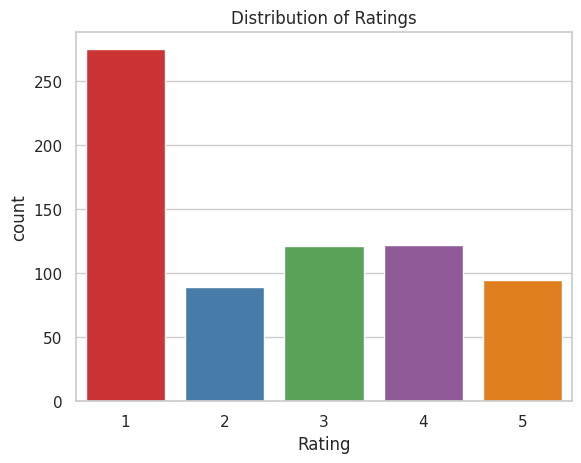

In [16]:
#Exploratory Data Analysis
#Let’s begin with the distribution of ratings:
sns.set(style='whitegrid')
sns.countplot(data=df,x='Rating',palette='Set1')
plt.title("Distribution of Ratings")

Text(0.5, 1.0, 'Distribution of Review Lengths')

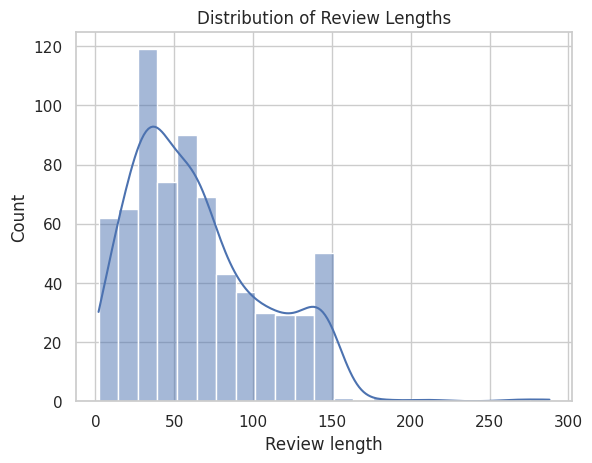

In [19]:
# Calculating the length of each review
df['Review length']=df['Review'].apply(len)
sns.histplot(df['Review length'],kde=True)
plt.title('Distribution of Review Lengths')

In [23]:
#Let’s proceed to label the dataset using TextBlob for sentiment analysis:
from textblob import TextBlob 

def sentiment_analysis(reviews):
    sentiment=TextBlob(reviews).sentiment
    if sentiment.polarity>0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else: return 'Neutral'

df['sentiment']=df['Review'].apply(sentiment_analysis)
df


,Review,Rating,Review length,sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive
...,...,...,...,...
697,"Can't trust, Going to uninstall just for that ...",1,53,Neutral
698,It really gets me linked in with my friends. H...,5,72,Positive
699,It lacks most of what makes the other social n...,4,81,Positive
700,Really disappointed in the new version. Seems ...,2,123,Neutral


<ipython-input-24-14f5143b9e77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='sentiment',palette='Set2')


Text(0.5, 1.0, 'Distribution of Sentiments')

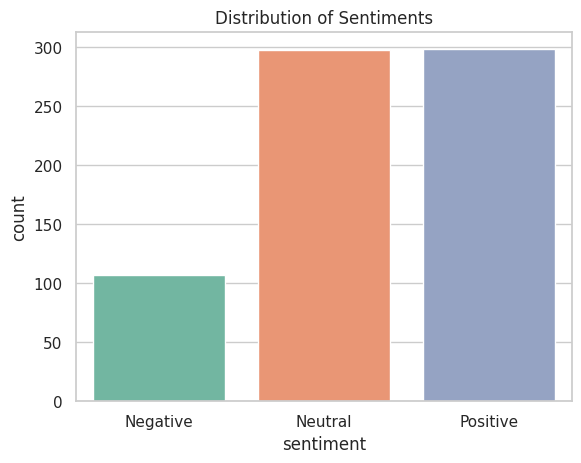

In [24]:
# Analyzing the distribution of sentiments
sns.countplot(data=df,x='sentiment',palette='Set2')
plt.title('Distribution of Sentiments')


Text(0.5, 1.0, 'Sentiment Distribution Across Ratings')

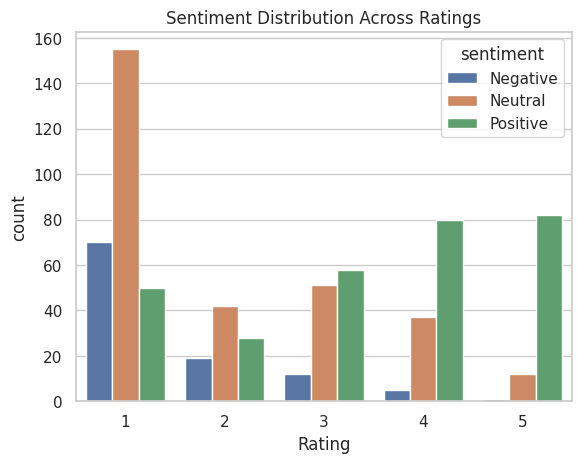

In [25]:
#Analysis the Sentiment Distribution Across Ratings
sns.countplot(data=df,x='Rating',hue='sentiment')
plt.title('Sentiment Distribution Across Ratings')

In [27]:
#let’s perform a text analysis to identify common words or themes within each sentiment category.

In [75]:
from wordcloud import WordCloud

In [81]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

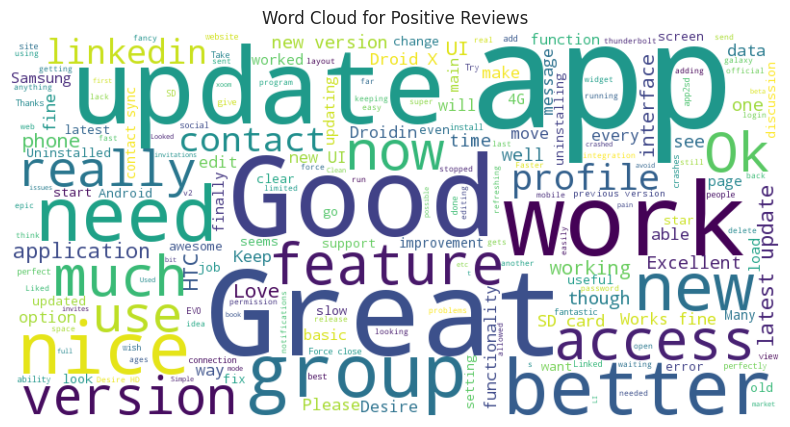

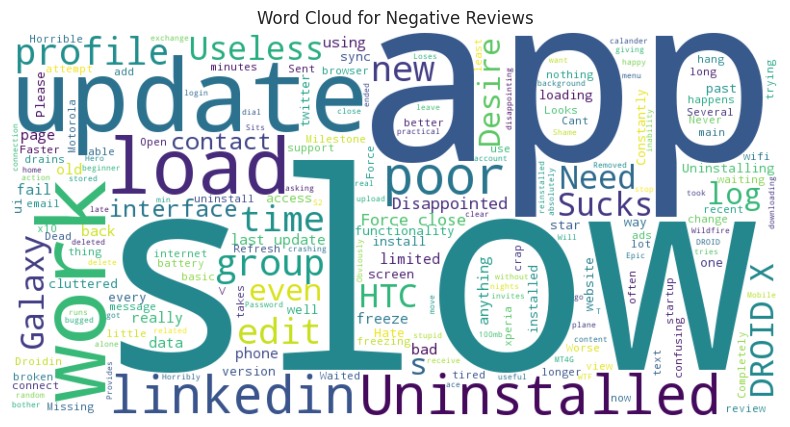

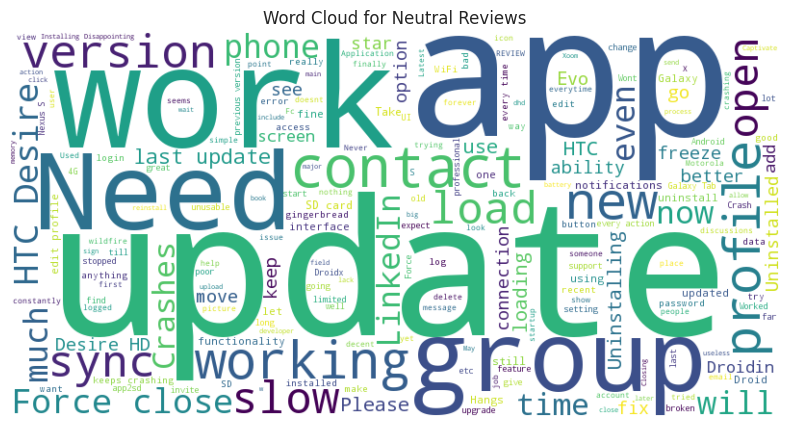

In [86]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)